## <font color=Grey>**Data Mind Classes**</font> 
### <font color=Black>Class 6: Linear Regression </font> 

<div class="alert alert-block alert-info">

***Linear Regression or Ordinary Least Squares Reqression (OLS)***

<div class="alert alert-block alert-info">
- Objective/Overview
- Cost function
- Deterministic approach vs SGD
- Assumptions
- Model Building Steps
> - Feature Engineering
> - Transformations
> - Scaling
> - Feature selection
> - Model evaluation
- Decode the results
- Goodness of fit criteria
- Inference
- Deployment

# 1. Overview

- Linear Regression is a supervised learning method used to map linear dependencies between predictor and dependent variables
- Used to map real values $ Y\in R $ outputs to set of inputs X (Eg: Sales, Price, Quantity sold etc..)
- With linear regression we aim to fit a line (or hyperplane in higher dimensions) to a scattering of data. In this Section we describe the fundamental concepts underlying this procedure 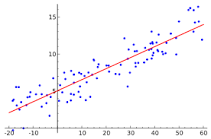

# 1.1 Cost Function Overview:

- Recall that for any learning algorithm we must have a cost function that is optimized to get 'best' results.
- In this case we will optimize for MSE to get the parameters (intercept, coefficients) of the line of least errors
- $Mean Squared Error = \frac{1}{N} \sum_{i=1}^{n} (y_i - \hat{y_i})^2$ 
    - $y_i$ = Target value for $i_{th}$ example
    - $\hat{y_i}$ = Predicted value for $i_{th}$ example


# 1.2 Notation, Equations & Some math

- Equation of a typical line with single independent variable (X) : $ \hat{y} = \alpha x + \beta $ 
- Where: 
    - $ \alpha $  = coefficient / slope
    - $ \beta $ =  Intercept / bias
    - $\hat{y}$ = Predicted value
- **Goal**: Find $ \alpha $ & $ \beta $ that minimize some loss function (error function)
******************************************************************************************************

# 1.3 Data format & Notation
											
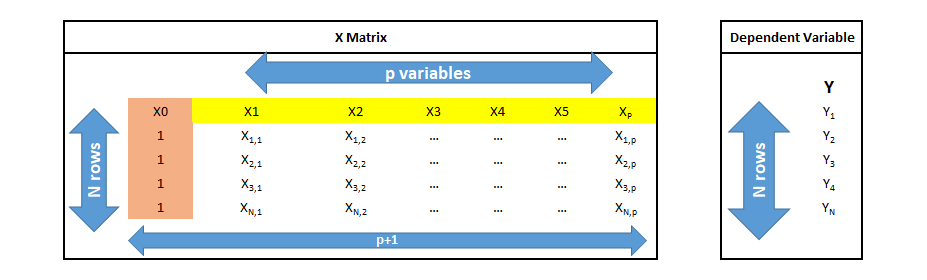

### Vector notation

\begin{equation}
\mathbf{x}_{p}=\left[\begin{array}{c}
x_{1,p+1}\\
x_{2,p+1}\\
\vdots\\
x_{N,p+1}
\end{array}\right]
\end{equation}

\begin{equation}
\mathbf{y}=\left[\begin{array}{c}
y_{1}\\
y_{2}\\
\vdots\\
y_{N}
\end{array}\right]
\end{equation}

## 1.3.1 Weight Matrix notation


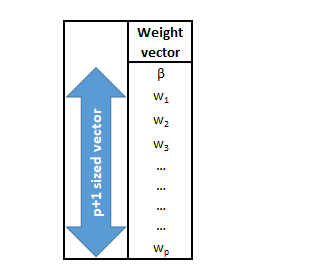

### Vector notation

\begin{equation}
\mathbf{w}=\left[\begin{array}{c}
\beta\\
\alpha_{1}\\
\alpha_{2}\\
\vdots\\
\alpha_{p}
\end{array}\right]
\end{equation}

*** W are alpha are the same ***

# 1.4 Putting it all together using matrix multiplication

We know  : $ \alpha x + \beta = \hat{y} $ 

So in matrix format our requation looks like this:

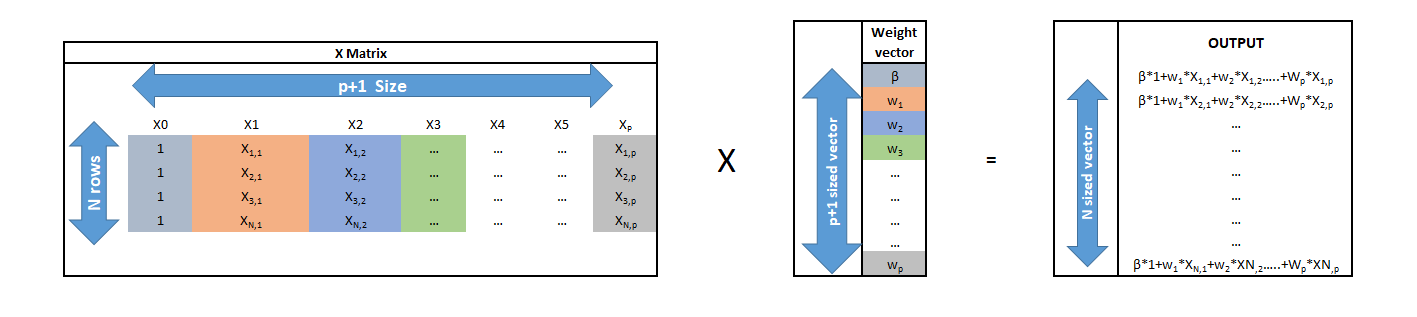

**Note: Null hypothesis is that each of weights (incl beta term) is equal to 0 **

# 1.5 Solution Overview

- We can solve for alpha/W and beta in two ways.

    - **Analytical Solution**: Deterministic as there is a solution to minimization objective of cost fn. 
    - ** Solution using SGD** which finds parameters which minimize the **obj fn/loss fn/cost fn*


# 1.5.1 Analytical Solution Math:

Given the hypothesis function:

$$ h_{\theta}(x)=\theta_0x_0+\theta_1x_1+\cdots+\theta_nx_n $$
We'd like to minimize the least-squares cost:

$$ J(\theta_{0...n})=\frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^2 $$
Where $x^{(i)}$ is the i-th sample (from a set of m samples) and $y^{(i)}$ is the i-th expected result.

To proceed, we'll represent the problem in matrix notation; this is natural, since we essentially have a system of linear equations here. The regression coefficients $\theta$ we're looking for are the vector:

$$\begin{pmatrix} \theta_0\\ \theta_1\\ ...\\ \theta_n \end{pmatrix}\in\mathbb{R}^{n+1}\ $$

Each of the m input samples is similarly a column vector with n+1 rows, $x_0$ being 1 for convenience. So we can now rewrite the hypothesis function as:

$$ h_{\theta}(x)=\theta^Tx\ $$

When this is summed over all samples, we can dip further into matrix notation. We'll define the "design matrix" X (uppercase X) as a matrix of m rows, in which each row is the i-th sample (the vector $x^{(i)}$). With this, we can rewrite the least-squares cost as following, replacing the explicit sum by matrix multiplication:

$$ J(\theta)=\frac{1}{2m}(X\theta-y)^T(X\theta-y)\  $$

Now, using some matrix transpose identities, we can simplify this a bit. I'll throw the $\frac{1}{2m}$ part away since we're going to compare a derivative to zero anyway:

$$ J(\theta)=((X\theta)^T-y^T)(X\theta-y)\ $$

$$ J(\theta)=(X\theta)^TX\theta-(X\theta)^Ty-y^T(X\theta)+y^Ty\ $$

Note that $X\theta$ is a vector, and so is $y$. So when we multiply one by another, it doesn't matter what the order is (as long as the dimensions work out). So we can further simplify:

$$ J(\theta)=\theta^TX^TX\theta-2(X\theta)^Ty+y^Ty\ $$

Recall that here $\theta$ is our unknown. To find where the above function has a minimum, we will derive by $\theta$ and compare to 0. Deriving by a vector may feel uncomfortable, but there's nothing to worry about. Recall that here we only use matrix notation to conveniently represent a system of linear formulae. So we derive by each component of the vector, and then combine the resulting derivatives into a vector again. The result is:

$$\frac{\partial J}{\partial \theta}=2X^TX\theta-2X^{T}y=0 $$
Or:

$$ X^TX\theta=X^{T}y $$

Now, assuming that the matrix $X^TX$ is invertible, we can multiply both sides by $(X^TX)^{-1}$ and get:

$$ \theta=(X^TX)^{-1}X^Ty\ $$
Which is the normal equation.



### Lets refer to the example in excel

# 1.6 Assumptions in order of practical importance:

- Linearity in Beta terms
- Independent variables should not exhibit strong correlation (>0.5 generally)
- Error terms must be normally distributed
- Error terms must have constant variance or homoskesdacity
- Residuals should not be autocoorelated $Res_i$ should not be related to $Res_{i-1}$


**How to check for these?** - We have standard tests for each of the above, however, we generally only check for 1,2,3; while 4 and 5 are optional in  most project work

# 1.7 Example walkthrough of LR using house price dataset

In [1]:
# https://www.kaggle.com/c/house-prices-advanced-regression-techniques
    
import numpy as np
import pandas as pd
from pandas_summary import DataFrameSummary

path = 'F:/My startup idea/Study Material/Class 6/'
data =    pd.read_csv(path+'House_price_data.csv')
print("shape of data is {} rows, {} columns".format(data.shape[0],data.shape[1]))
print('*'*100)
print (data.head())
print('*'*100)
summary = DataFrameSummary(data).columns_stats
print(summary)

FileNotFoundError: File b'F:/My startup idea/Study Material/Class 6/House_price_data.csv' does not exist

In [ ]:
# closer look at summary
(summary)

In [ ]:
### Print all variables with missing values in reverse order of missing val %

for i,j in sorted(zip(pd.isnull(data).sum().index,round(100*pd.isnull(data).sum()/data.shape[0],1)),key = lambda x: -x[1]):
    if j > 0:
        print(i,"---"*3,data[i].dtypes,"---"*4,j,"%")

In [ ]:
### Lets drop variables with more than 40% missing values

drop_criteria = 40  ### keep it modular
drop_list = []   ### initiate empty list

for i,j in sorted(zip(pd.isnull(data).sum().index,round(100*pd.isnull(data).sum()/data.shape[0],1)),key = lambda x: -x[1]):
    if j > drop_criteria:
        drop_list.append(i)

data.drop(drop_list, inplace=True,axis=1)
print(drop_list)

In [ ]:
### missing value strategy for continuous variables is to replace by mean and for categorical is to replace by mode:

def missing_impute(df):
    for cols in df.columns:
        #print(cols)
        if df[cols].dtype == 'float':   ### continuous
            print('float type:',cols)
            df[cols].fillna(df[cols].mean(),inplace=True)
        elif df[cols].dtype == 'object':  ### categorical
            print('obj type:',cols)
            df[cols].fillna(df[cols].mode(),inplace=True)
        elif df[cols].dtype == 'int64':  ### categorical but numeric encoded
            print(cols)
            df[cols].fillna(df[cols].mode(),inplace=True)
        else:
            print(cols, "Does not belong")
    return df

In [ ]:
## imputed df
imputed_df = missing_impute(data)
imputed_df.head()

In [ ]:
#### For sake of example lets pick only some variables for LR

X_var = ['MSSubClass','MSZoning','LotFrontage','LotArea','Street','HouseStyle','Fireplaces','GarageArea','PoolArea','BedroomAbvGr']
Y_var = ['SalePrice']

X = imputed_df[X_var]
Y = imputed_df[Y_var]

In [ ]:
# categorical variables 

categ = [i for i in X.columns if X[i].dtype=='object']
categ

In [ ]:
# convert to dummy variables
X = pd.get_dummies(X)
X.head()

In [ ]:
# correlation plot
import matplotlib.pyplot as plt
import seaborn as sns
#f, ax = plt.subplots(figsize=(10, 8))
corr = X.corr()
corr.style.background_gradient()
# sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
#             square=True, ax=ax)

In [ ]:
## VIF - We can also use VIF based approach with cutoff of 5 to decide on variable inclusion

In [ ]:
# create training and testing datasets
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

In [ ]:
## make sure no NULL values are there in the input df
assert (X.isnull().sum().sum() == 0)

In [ ]:
##  model building
lm = linear_model.LinearRegression()
#y_trainy_train.astype('float64') 
model = lm.fit(X_train, y_train)
predictions = model.predict(X_test) ## .predict is generally used to get predictions. While .predict_proba to get probs

In [ ]:
## Metric MAPE and evaluation on validation
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)*100 / y_true))

In [ ]:
print ("Val Error:", mean_absolute_percentage_error(y_test, predictions))
print ("Train Error:", mean_absolute_percentage_error(y_train, model.predict(X_train)))

In [ ]:
model.intercept_

In [ ]:
(model.coef_)

In [ ]:
### Cross validation with r square - which is % variance explained
from sklearn import metrics
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, Y, cv=5, scoring='r2')
print (scores,np.mean(scores))

In [ ]:
### Lets also try with using standardization/normalization of dataset for continuous variables
### We will do only on 1 variable for now but this can be done for any number of continuous vars
# X_norm = (X-mean/Std Dev)

from sklearn.preprocessing import StandardScaler
var = 'LotArea'

scaler = StandardScaler()
X['var'] = scaler.fit_transform(X[var].reshape(-1,1))  ### fit_transform will fit and transform

### What does fit do? -- fit calculates then mean and std dev of a column, transform transforms using the provided formula



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
##  model building
lm = linear_model.LinearRegression()
#y_trainy_train.astype('float64') 
model = lm.fit(X_train, y_train)
predictions = model.predict(X_test) ## .predict is generally used to get predictions. While .predict_proba to get probs
scores = cross_val_score(model, X, Y, cv=5, scoring='r2')
print (scores,np.mean(scores))

In [ ]:
## QQ plot of residuals
import statsmodels.api as sm
res = Y-model.predict(X)
fig = sm.qqplot(res)
plt.show()

In [ ]:
## Residual vs fitted to check for any patterns and derive non linearity and transformtions

plt.scatter(model.predict(X),res,c='b')

# This seems random so no transformation is required

In [ ]:
### Lets run again using log transformation of the Y variable

X_train, X_test, y_train, y_test = train_test_split(X, np.log(Y), test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
##  model building
lm = linear_model.LinearRegression()
#y_trainy_train.astype('float64') 
model = lm.fit(X_train, y_train)
predictions = model.predict(X_test) ## .predict is generally used to get predictions. While .predict_proba to get probs
predictions = np.exp(predictions) ### dont forget to exponentiate back to get original values

In [ ]:
##
print ("Val Error:", mean_absolute_percentage_error(np.exp(y_test), predictions))
print ("Train Error:", mean_absolute_percentage_error(np.exp(y_train), np.exp(model.predict(X_train))))

In [ ]:
#### statsmodels provides easy API to visualize results 
data_upd = pd.concat([X,Y],axis=1)
import statsmodels.api as sm
import statsmodels.formula.api as smf

# run regression
lm = smf.ols(formula = 'SalePrice ~ MSSubClass+LotFrontage+Fireplaces+PoolArea', data = data_upd).fit()

In [ ]:
print(lm.summary())

# We should select variables with p value < 0.05
# AIC is used to compare different models, and the one with lower AIC is generally better.

In [ ]:
## QQ plot
qqplot = sm.qqplot(lm.resid, line='s')
plt.show(qqplot)

In [ ]:
# residuals vs fitted vals to figure out an transformations are required or not. Should be random for no transformations required
plt.plot(lm.fittedvalues, lm.resid,  'o')

## This has a funnel shape, so we should do some transformtions on Y; possibly log, or sqrt or something

# Assignment

- Explore the kaggle dataset provided by visualizing various relationships (use Seaborn, Matplotlib for charts)
- Create new variables if applicable
- Detect outliers by visual analysis or cap based on mean+/- 3 sigma rule
- Run ols regression using the statmodel package
- Select variables based on correlation,p-values - Note, exclude 1 variable at a time and keep evaluating
- Report results

# Putting it all together; more professionally

- Visualize/EDA
- Outliers
- Missing Value
- Feat Engg.
- Validation
- Model(s)
- Fine tune model(s)
- Final results

## Data reading

In [2]:
## import libs

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

In [3]:
## Read data

train = pd.read_csv('C:/Users/rajneesh.tiwari/Downloads/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Dictionary

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

In [4]:
## check shape & size
print("The train data size : {} ".format(train.shape))

#Save the 'Id' column
train_ID = train['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)

The train data size : (1460, 81) 


## Outlier analysis visual inspection

- Analyze grLivArea variable

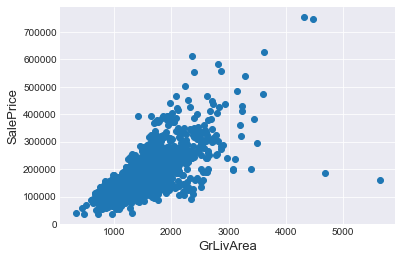

In [5]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

- We can see at the bottom right two with extremely large GrLivArea that are of a low price. These values are huge oultliers. Therefore, we can safely delete them.

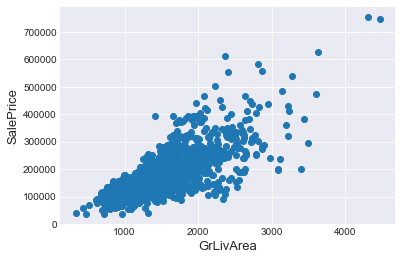

In [6]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

- There are probably others outliers in the training data. However, removing all them may affect badly our models if ever there were also outliers in the test data. That's why , instead of removing them all, we will just manage to make some of our models robust on them



## Target Variable Analysis


##### SalePrice is the variable we need to predict. So let's do some analysis on this variable first.


 mu = 180932.9 and sigma = 79495.1



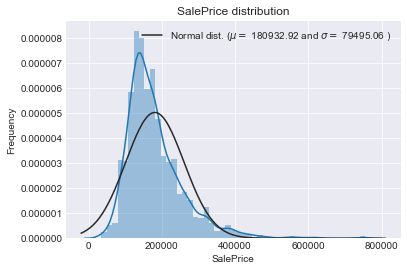

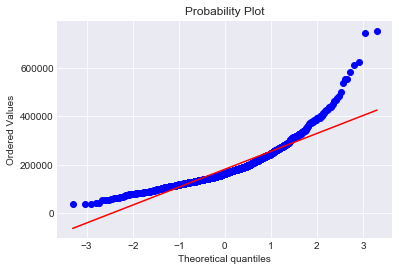

In [7]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = (train['SalePrice'].mean(),train['SalePrice'].std())
print( '\n mu = {:.1f} and sigma = {:.1f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

- The target variable is not normally distributed. We need to try and make is normally distributed by transformations as Linear Regressions love Normal dist targets

- Possible transformations of target:
    - $\log (1+Target) $     ### add  1 to avoid error due to log(0) like situations ###
    - $ \sqrt(Target) $
    - $ Target^{2} $ 
    - $ \frac {1}{Target}$ 
    - $ Target^{(2/3)} $

## Log Transformation of target


 mu = 12.02 and sigma = 0.40



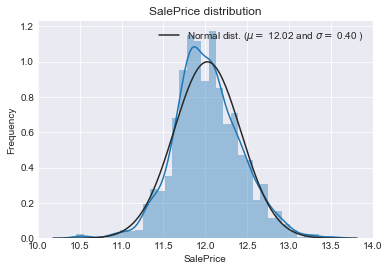

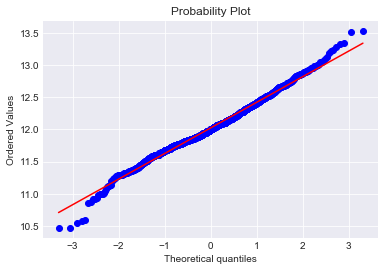

In [8]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

- The skew seems now corrected and the data appears more normally distributed.

## Feature Engineering

In [9]:
ntrain = train.shape[0]
y_train = train.SalePrice.values
all_data = train
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (1458, 79)


## Missing Data

In [10]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
PoolQC,99.588
MiscFeature,96.296
Alley,93.759
Fence,80.727
FireplaceQu,47.325
LotFrontage,17.764
GarageYrBlt,5.556
GarageType,5.556
GarageFinish,5.556
GarageQual,5.556


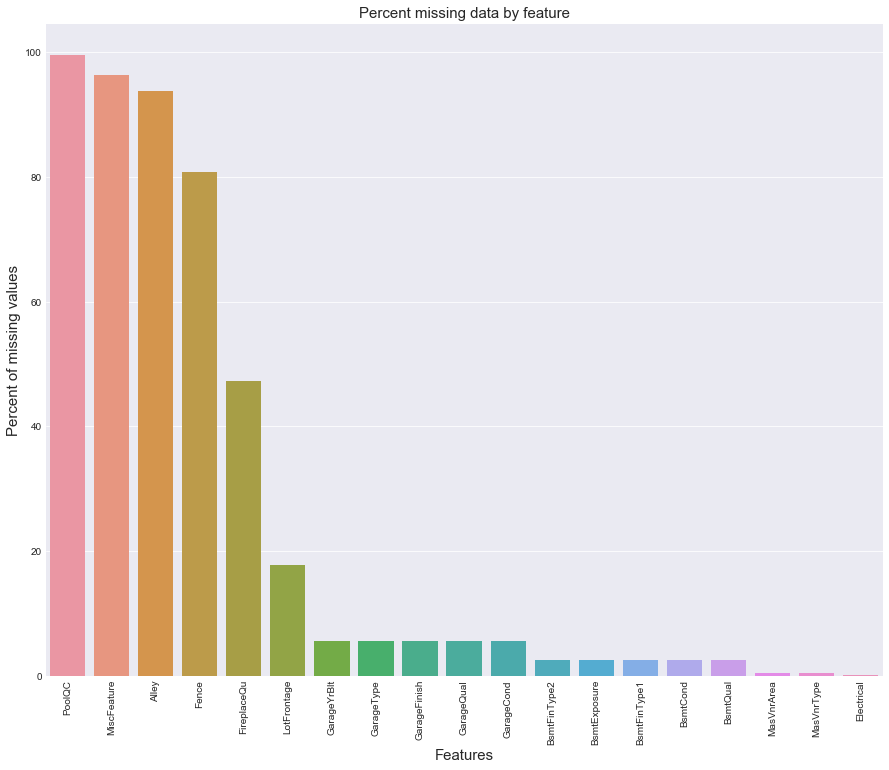

In [11]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

## Data Correlation with target variable

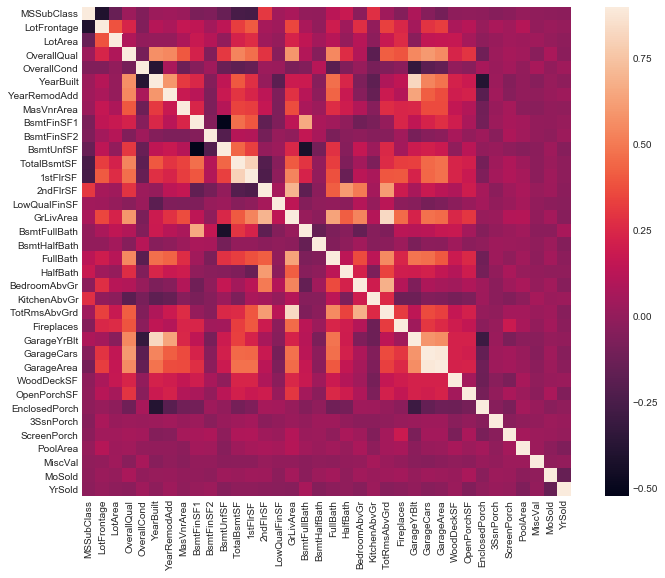

In [12]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

## Imputing missing values by looking through the definitions

- **PoolQC** : data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.

In [13]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

- **MiscFeature :** data description says NA means "no misc feature"

In [14]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

- **Alley :** data description says NA means "no alley access"

In [15]:
all_data["Alley"] = all_data["Alley"].fillna("None")

- **Fence :** data description says NA means "no fence"

In [16]:
all_data["Fence"] = all_data["Fence"].fillna("None")

- **FireplaceQu :** data description says NA means "no fireplace"

In [17]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

- **LotFrontage :** Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.

In [18]:
a = all_data.groupby("Neighborhood")["LotFrontage"].median()
print(a)

Neighborhood
Blmngtn   43.000
Blueste   24.000
BrDale    21.000
BrkSide   52.000
ClearCr   80.000
CollgCr   70.000
Crawfor   74.000
Edwards   64.500
Gilbert   65.000
IDOTRR    60.000
MeadowV   21.000
Mitchel   73.000
NAmes     73.000
NPkVill   24.000
NWAmes    80.000
NoRidge   91.000
NridgHt   88.500
OldTown   60.000
SWISU     60.000
Sawyer    71.000
SawyerW   66.500
Somerst   73.500
StoneBr   61.500
Timber    85.000
Veenker   68.000
Name: LotFrontage, dtype: float64


In [20]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] =all_data.groupby(["Neighborhood"]).LotFrontage.apply(lambda x: x.fillna(x.median()))


- **GarageType, GarageFinish, GarageQual and GarageCond** : Replacing missing data with None

In [19]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

- **GarageYrBlt, GarageArea and GarageCars** : Replacing missing data with 0 (Since No garage = no cars in such garage.)

In [21]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

 - **BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath** : missing values are likely zero for having no basement

In [22]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

- **BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2** : For all these categorical basement-related features, NaN means that there is no basement.

In [23]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

- **MasVnrArea and MasVnrType** : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.

In [24]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

- **MSZoning (The general zoning classification) : **'RL' is by far the most common value. So we can fill in missing values with '
    RL'

In [25]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

- **Utilities :** For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.

In [26]:
all_data['Utilities'].describe()

count       1458
unique         2
top       AllPub
freq        1457
Name: Utilities, dtype: object

In [27]:
all_data = all_data.drop(['Utilities'], axis=1)

- **Functional :** data description says NA means typical

In [28]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")


- **Electrical :** It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.

In [29]:
all_data['Electrical'].describe()

count      1457
unique        5
top       SBrkr
freq       1332
Name: Electrical, dtype: object

In [30]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

- **KitchenQual:** Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.

In [31]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

- **Exterior1st and Exterior2nd :** Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string

In [32]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

- **SaleType :** Fill in again with most frequent which is "WD"

In [33]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

- **MSSubClass :** NA most likely means No building class. We can replace missing values with None

In [34]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

Have we addressed all the missing values?

In [35]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


No missing values now

## Some numeric variables are really categories so we will convert them to the same

In [36]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [37]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (1458, 78)


In [38]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

## Skewed Features

In [39]:
numeric_feats = [col for col in all_data.columns if all_data[col].dtypes != 'object']
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,24.435
PoolArea,15.933
LotArea,12.561
3SsnPorch,10.287
LowQualFinSF,8.996
LandSlope,4.805
KitchenAbvGr,4.480
BsmtFinSF2,4.248
ScreenPorch,4.115
BsmtHalfBath,4.096


### Box Cox Transformation of (highly) skewed features ###

We use the scipy function boxcox1p which computes the Box-Cox transformation of  1+x .

Note that setting  λ=0  is equivalent to log1p used above for the target variable.

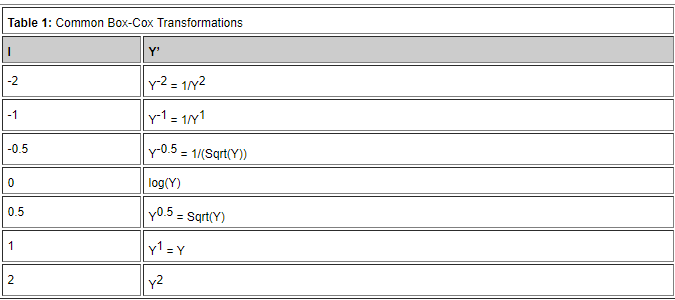

In [40]:
## we will choose 0.75 skewness as criteria to correct
skewness = skewness[abs(skewness.Skew)>0.75]
skewness;
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

There are 36 skewed numerical features to Box Cox transform


In [41]:
from scipy.special import boxcox1p
skewed_features = skewness.index
bx_cx_criteria = 0.15   #### should be b/w 0 and 1 for our case
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], bx_cx_criteria)

## One hot encoding of all categorical vars

In [42]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(1458, 220)


In [43]:
y_train.shape

(1458,)

## Modelling phase

In [44]:
# imports

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

## Remove multicollinear variables via automated VIF < 5 selection

- Use only for continuous variables
- For categorical variables, we use other tests, however, generally, we can skip those in most analyses

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.preprocessing import Imputer

class ReduceVIF(BaseEstimator, TransformerMixin):
    def __init__(self, thresh=5.0, impute=True, impute_strategy='median'):
        # From looking at documentation, values between 5 and 10 are "okay".
        # Above 10 is too high and so should be removed.
        self.thresh = thresh
        
        # The statsmodel function will fail with NaN values, as such we have to impute them.
        # By default we impute using the median value.
        # This imputation could be taken out and added as part of an sklearn Pipeline.
        if impute:
            self.imputer = Imputer(strategy=impute_strategy)

    def fit(self, X, y=None):
        print('ReduceVIF fit')
        if hasattr(self, 'imputer'):
            self.imputer.fit(X)
        return self

    def transform(self, X, y=None):
        print('ReduceVIF transform')
        columns = X.columns.tolist()
        if hasattr(self, 'imputer'):
            X = pd.DataFrame(self.imputer.transform(X), columns=columns)
        return ReduceVIF.calculate_vif(X, self.thresh)

    @staticmethod
    def calculate_vif(X, thresh=5.0):
        # Taken from https://stats.stackexchange.com/a/253620/53565 and modified
        dropped=True
        while dropped:
            variables = X.columns
            dropped = False
            vif = [variance_inflation_factor(X[variables].values, X.columns.get_loc(var)) for var in X.columns]
            
            max_vif = max(vif)
            if max_vif > thresh:
                maxloc = vif.index(max_vif)
                print('Dropping {} with vif {}'.format(X.columns[maxloc],max_vif))
                X = X.drop([X.columns.tolist()[maxloc]], axis=1)
                dropped=True
        return X

In [65]:
transformer = ReduceVIF()
all_data_VIF_excl = transformer.fit_transform(all_data[all_data.columns], y=None)

all_data_VIF_excl.head()

ReduceVIF fit
ReduceVIF transform


C:\Users\rajneesh.tiwari\AppData\Local\conda\conda\envs\python35_env\lib\site-packages\statsmodels\stats\outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping MSZoning_C (all) with vif inf
Dropping LandContour_Bnk with vif inf
Dropping LotConfig_Corner with vif inf
Dropping Neighborhood_Blmngtn with vif inf
Dropping Condition1_Artery with vif inf
Dropping Condition2_Artery with vif inf
Dropping BldgType_1Fam with vif inf
Dropping HouseStyle_1.5Fin with vif inf
Dropping RoofStyle_Flat with vif inf
Dropping RoofMatl_CompShg with vif inf
Dropping Exterior1st_AsbShng with vif inf
Dropping Exterior1st_CBlock with vif inf
Dropping Exterior2nd_AsbShng with vif inf
Dropping MasVnrType_BrkCmn with vif inf
Dropping Foundation_BrkTil with vif inf
Dropping Heating_Floor with vif inf
Dropping Electrical_FuseA with vif inf
Dropping GarageType_2Types with vif inf
Dropping MiscFeature_Gar2 with vif inf
Dropping SaleType_COD with vif inf
Dropping SaleCondition_Normal with vif 601421.6548195811
Dropping GarageYrBlt with vif 91971.36143587342
Dropping YearBuilt with vif 27909.479491965838
Dropping TotalSF with vif 22801.171599668298
Dropping YearRemod

,const,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.000,9,5.831,19.212,0.730,1,3,0.000,7,4,...,0,0,0,1,0,0,0,0,1,0
1,1.000,4,6.221,19.712,0.730,1,3,0.000,6,7,...,0,0,0,1,0,0,0,0,1,0
2,1.000,9,5.915,20.347,0.730,1,0,0.000,7,4,...,0,0,0,1,0,0,0,0,1,0
3,1.000,10,5.685,19.692,0.730,1,0,0.000,7,4,...,0,0,0,1,1,0,0,0,0,0
4,1.000,9,6.315,21.325,0.730,1,0,0.000,8,4,...,0,0,0,1,0,0,0,0,1,0


## Model Build

In [66]:
# run regression on entire data/all cols
import statsmodels.api as sm

X = sm.add_constant(all_data)
model = sm.OLS(y_train,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     107.8
Date:                Wed, 20 Jun 2018   Prob (F-statistic):               0.00
Time:                        10:54:36   Log-Likelihood:                 1377.8
No. Observations:                1458   AIC:                            -2356.
Df Residuals:                    1258   BIC:                            -1299.
Df Model:                         199                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.6431      0.475      1.353      0.176      -0.289       1.576
MSSubClass               -0.0014      0.003     -0.446      0.656      -0.008       0.005
LotFrontage               0.0086      0.008      1.035      0.301      -0.008       0.025
LotArea                   0.0231      0.003      8.640      0.000       0.018       0.028
Street                    0.1217      0.069      1.755      0.080      -0.014       0.258
Alley                     0.0148      0.013      1.130      0.259      -0.011       0.041
LotShape                  0.0029      0.002      1.251      0.211      -0.002       0.008
LandSlope                 0.0100      0.021      0.468      0.640      -0.032       0.052
OverallQual               0.0405      0.004      9.296      0.000       0.032       0.049
OverallCond               0.0412      0.004     11.396      0.000       0.034       0.048
YearBuilt                 0.0019      0.000      5.600      0.000       0.001       0.002
YearRemodAdd              0.0006      0.000      2.633      0.009       0.000       0.001
MasVnrArea                0.0012      0.003      0.441      0.659      -0.004       0.006
ExterQual                -0.0177      0.014     -1.224      0.221      -0.046       0.011
ExterCond                 0.0165      0.013      1.277      0.202      -0.009       0.042
BsmtQual                 -0.0094      0.004     -2.523      0.012      -0.017      -0.002
BsmtCond                  0.0132      0.008      1.659      0.097      -0.002       0.029
BsmtExposure             -0.0066      0.006     -1.050      0.294      -0.019       0.006
BsmtFinType1             -0.0004      0.002     -0.164      0.870      -0.005       0.004
BsmtFinSF1                0.0039      0.001      3.162      0.002       0.001       0.006
BsmtFinType2             -0.0123      0.013     -0.983      0.326      -0.037       0.012
BsmtFinSF2               -0.0033      0.002     -1.953      0.051      -0.007    1.53e-05
BsmtUnfSF                -0.0053      0.002     -3.432      0.001      -0.008      -0.002
TotalBsmtSF            5.386e-05   3.58e-05      1.504      0.133   -1.64e-05       0.000
HeatingQC                -0.0078      0.002     -3.582      0.000      -0.012      -0.004
CentralAir                0.0714      0.023      3.101      0.002       0.026       0.117
1stFlrSF                 -0.0063      0.017     -0.365      0.715      -0.040       0.028
2ndFlrSF                 -0.0001      0.004     -0.031      0.975      -0.007       0.007
LowQualFinSF             -0.0019      0.004     -0.492      0.623      -0.010       0.006
GrLivArea                 0.0929      0.026      3.580      0.000       0.042       0.144
BsmtFullBath              0.0281      0.008      3.484      0.001       0.012       0.044
BsmtHalfBath           

In [101]:
# run regression on VIF excluded cols
import statsmodels.api as sm

X_ = sm.add_constant(all_data_VIF_excl)
model = sm.OLS(y_train,X_)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     43.40
Date:                Wed, 20 Jun 2018   Prob (F-statistic):               0.00
Time:                        11:39:24   Log-Likelihood:                 502.36
No. Observations:                1458   AIC:                            -732.7
Df Residuals:                    1322   BIC:                            -13.99
Df Model:                         135                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.9297      0.030    400.409      0.000      11.871      11.988
LotShape                 -0.0043      0.004     -1.067      0.286      -0.012       0.004
LandSlope                 0.0127      0.035      0.369      0.712      -0.055       0.081
BsmtFinType1             -0.0053      0.003     -1.945      0.052      -0.011    4.72e-05
BsmtFinSF2                0.0010      0.002      0.535      0.593      -0.003       0.004
HeatingQC                -0.0256      0.004     -7.046      0.000      -0.033      -0.018
LowQualFinSF              0.0070      0.005      1.347      0.178      -0.003       0.017
BsmtFullBath              0.0541      0.012      4.445      0.000       0.030       0.078
BsmtHalfBath              0.0276      0.030      0.907      0.365      -0.032       0.087
HalfBath                  0.0386      0.014      2.826      0.005       0.012       0.065
Fireplaces                0.0999      0.009     10.678      0.000       0.082       0.118
WoodDeckSF                0.0081      0.001      5.847      0.000       0.005       0.011
OpenPorchSF               0.0133      0.002      7.083      0.000       0.010       0.017
EnclosedPorch             0.0014      0.002      0.653      0.514      -0.003       0.006
3SsnPorch                 0.0092      0.005      1.828      0.068      -0.001       0.019
ScreenPorch               0.0106      0.002      4.390      0.000       0.006       0.015
PoolArea                  0.0318      0.008      3.964      0.000       0.016       0.048
YrSold                   -0.0045      0.004     -1.195      0.232      -0.012       0.003
MSZoning_FV               0.1656      0.031      5.358      0.000       0.105       0.226
MSZoning_RH              -0.0103      0.050     -0.208      0.835      -0.108       0.087
MSZoning_RM               0.0444      0.026      1.739      0.082      -0.006       0.094
LandContour_HLS           0.0364      0.030      1.202      0.230      -0.023       0.096
LandContour_Low          -0.0206      0.040     -0.510      0.610      -0.100       0.059
LotConfig_CulDSac         0.0593      0.024      2.473      0.014       0.012       0.106
LotConfig_FR2            -0.0664      0.030     -2.183      0.029      -0.126      -0.007
LotConfig_FR3            -0.1033      0.097     -1.063      0.288      -0.294       0.087
LotConfig_Inside         -0.0235      0.013     -1.769      0.077      -0.049       0.003
Neighborhood_Blueste      0.0075      0.134      0.056      0.955      -0.255       0.270
Neighborhood_BrDale      -0.0939      0.062     -1.503      0.133      -0.216       0.029
Neighborhood_BrkSide     -0.1108      0.034     -3.225      0.001      -0.178      -0.043
Neighborhood_ClearCr      0.1287      0.043      3.004      0.003       0.045       0.213
Neighborhood_CollgCr   

## Iterative p value based selection and rebuild

- Drop variables based on high p value; 
    - If there a lot of variables then we should do this in batches picking high, then medium, then low p-values in each iteration
    - If number of variables < 20, then we should exclude variables one at a time starting with highest p-value and then continue excluding until all p-values are in desired range (<0.05)

In [102]:
## Iter 1: Drop highest p values variables

iter1_drop_pval = ['BldgType_2fmCon','Neighborhood_Blueste','SaleCondition_Alloca','Condition1_RRAn','SaleCondition_AdjLand','Condition2_PosN'
                   ,'MSZoning_RH','Heating_OthW','Condition2_Feedr','Exterior1st_AsphShn','Exterior1st_WdShing','Exterior2nd_Brk Cmn'
                   ,'HouseStyle_1.5Unf','Exterior1st_MetalSd','LandSlope','HouseStyle_SFoyer','HouseStyle_SLvl','Condition2_RRAn'
                   ,'RoofMatl_Membran','LandContour_Low','RoofMatl_Roll','SaleType_ConLI','BsmtFinSF2','Exterior1st_ImStucc','Exterior2nd_CBlock'
                   ,'RoofStyle_Gambrel','Condition1_PosN','EnclosedPorch','RoofMatl_WdShake','Exterior2nd_Other','Exterior2nd_AsphShn'
                   ,'Foundation_Wood','Condition2_RRAe','Neighborhood_Gilbert','SaleType_Oth']

all_data_VIF_pval_excl = all_data_VIF_excl.drop(iter1_drop_pval,inplace=False,axis=1)
X_ = sm.add_constant(all_data_VIF_pval_excl)
model = sm.OLS(y_train,X_)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     59.64
Date:                Wed, 20 Jun 2018   Prob (F-statistic):               0.00
Time:                        11:42:48   Log-Likelihood:                 497.41
No. Observations:                1458   AIC:                            -792.8
Df Residuals:                    1357   BIC:                            -259.1
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.9171      0.026    452.158      0.000      11.865      11.969
LotShape                 -0.0037      0.004     -0.936      0.349      -0.011       0.004
BsmtFinType1             -0.0051      0.003     -1.914      0.056      -0.010       0.000
HeatingQC                -0.0248      0.003     -7.087      0.000      -0.032      -0.018
LowQualFinSF              0.0069      0.005      1.400      0.162      -0.003       0.017
BsmtFullBath              0.0554      0.012      4.779      0.000       0.033       0.078
BsmtHalfBath              0.0247      0.029      0.841      0.400      -0.033       0.082
HalfBath                  0.0377      0.013      2.861      0.004       0.012       0.064
Fireplaces                0.0990      0.009     10.894      0.000       0.081       0.117
WoodDeckSF                0.0081      0.001      5.995      0.000       0.005       0.011
OpenPorchSF               0.0134      0.002      7.378      0.000       0.010       0.017
3SsnPorch                 0.0095      0.005      1.953      0.051   -4.39e-05       0.019
ScreenPorch               0.0105      0.002      4.479      0.000       0.006       0.015
PoolArea                  0.0318      0.008      4.072      0.000       0.016       0.047
YrSold                   -0.0039      0.004     -1.038      0.300      -0.011       0.003
MSZoning_FV               0.1704      0.029      5.963      0.000       0.114       0.226
MSZoning_RM               0.0465      0.024      1.908      0.057      -0.001       0.094
LandContour_HLS           0.0360      0.028      1.265      0.206      -0.020       0.092
LotConfig_CulDSac         0.0606      0.023      2.601      0.009       0.015       0.106
LotConfig_FR2            -0.0668      0.030     -2.249      0.025      -0.125      -0.009
LotConfig_FR3            -0.1035      0.094     -1.096      0.273      -0.289       0.082
LotConfig_Inside         -0.0230      0.013     -1.781      0.075      -0.048       0.002
Neighborhood_BrDale      -0.0931      0.060     -1.546      0.122      -0.211       0.025
Neighborhood_BrkSide     -0.1077      0.032     -3.394      0.001      -0.170      -0.045
Neighborhood_ClearCr      0.1379      0.038      3.607      0.000       0.063       0.213
Neighborhood_CollgCr      0.0833      0.019      4.313      0.000       0.045       0.121
Neighborhood_Crawfor      0.1612      0.030      5.330      0.000       0.102       0.221
Neighborhood_Edwards     -0.1001      0.023     -4.339      0.000      -0.145      -0.055
Neighborhood_IDOTRR      -0.3033      0.040     -7.657      0.000      -0.381      -0.226
Neighborhood_MeadowV     -0.3935      0.061     -6.414      0.000      -0.514      -0.273
Neighborhood_Mitchel     -0.0223      0.029     -0.767      0.443      -0.079       0.035
Neighborhood_NPkVill   

In [103]:
## Iter 2: Also drop high+medium p values variables

iter2_drop_pval = ['BldgType_2fmCon','Neighborhood_Blueste','SaleCondition_Alloca','Condition1_RRAn','SaleCondition_AdjLand'
                   ,'Condition2_PosN','MSZoning_RH','Heating_OthW','Condition2_Feedr','Exterior1st_AsphShn','Exterior1st_WdShing'
                   ,'Exterior2nd_Brk Cmn','HouseStyle_1.5Unf','Exterior1st_MetalSd','LandSlope','HouseStyle_SFoyer'
                   ,'HouseStyle_SLvl','Condition2_RRAn','RoofMatl_Membran','LandContour_Low','RoofMatl_Roll','SaleType_ConLI'
                   ,'BsmtFinSF2','Exterior1st_ImStucc','Exterior2nd_CBlock','RoofStyle_Gambrel','Condition1_PosN'
                   ,'EnclosedPorch','RoofMatl_WdShake','Exterior2nd_Other','Exterior2nd_AsphShn','Foundation_Wood'
                   ,'Condition2_RRAe','Neighborhood_Gilbert','SaleType_Oth','SaleType_Con','Condition1_RRAe','BsmtHalfBath'
                   ,'RoofStyle_Shed','RoofMatl_Tar&Grv','Neighborhood_Mitchel','Neighborhood_SWISU','Condition1_RRNe'
                   ,'Heating_Wall','LotConfig_FR3','LotShape','Exterior2nd_ImStucc','Foundation_Stone','RoofStyle_Mansard'
                   ,'YrSold','LandContour_HLS','MiscFeature_Othr','Condition1_RRNn','HouseStyle_2.5Unf','Neighborhood_Sawyer'
                   ,'LowQualFinSF','MiscFeature_TenC','Exterior1st_Plywood','GarageType_Basment','Neighborhood_BrDale'
                   ,'Exterior2nd_Wd Shng','Electrical_Mix','Neighborhood_NPkVill','SaleCondition_Family','Exterior1st_BrkComm'
                   ,'MiscFeature_Shed','RoofMatl_Metal','SaleType_ConLw','Condition2_RRNn','Electrical_FuseP','MSZoning_RM'
                   ,'LotConfig_Inside','3SsnPorch','GarageType_BuiltIn','Exterior1st_Wd Sdng','Exterior2nd_Plywood'
                   ,'SaleType_ConLD','BsmtFinType1']

all_data_VIF_pval_excl_v2 = all_data_VIF_excl.drop(iter2_drop_pval,inplace=False,axis=1)
X_ = sm.add_constant(all_data_VIF_pval_excl_v2)
model = sm.OLS(y_train,X_)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     99.31
Date:                Wed, 20 Jun 2018   Prob (F-statistic):               0.00
Time:                        11:43:49   Log-Likelihood:                 448.23
No. Observations:                1458   AIC:                            -780.5
Df Residuals:                    1400   BIC:                            -474.0
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.8523      0.018    668.398      0.000      11.818      11.887
HeatingQC                -0.0251      0.003     -7.336      0.000      -0.032      -0.018
BsmtFullBath              0.0603      0.010      6.011      0.000       0.041       0.080
HalfBath                  0.0455      0.013      3.515      0.000       0.020       0.071
Fireplaces                0.1024      0.009     11.335      0.000       0.085       0.120
WoodDeckSF                0.0082      0.001      6.124      0.000       0.006       0.011
OpenPorchSF               0.0135      0.002      7.459      0.000       0.010       0.017
ScreenPorch               0.0098      0.002      4.192      0.000       0.005       0.014
PoolArea                  0.0313      0.007      4.427      0.000       0.017       0.045
MSZoning_FV               0.1630      0.027      5.972      0.000       0.109       0.217
LotConfig_CulDSac         0.0817      0.020      4.048      0.000       0.042       0.121
LotConfig_FR2            -0.0231      0.028     -0.829      0.407      -0.078       0.032
Neighborhood_BrkSide     -0.0883      0.028     -3.169      0.002      -0.143      -0.034
Neighborhood_ClearCr      0.1431      0.036      3.933      0.000       0.072       0.215
Neighborhood_CollgCr      0.0918      0.019      4.958      0.000       0.056       0.128
Neighborhood_Crawfor      0.1701      0.029      5.893      0.000       0.113       0.227
Neighborhood_Edwards     -0.1048      0.021     -4.892      0.000      -0.147      -0.063
Neighborhood_IDOTRR      -0.2633      0.033     -7.960      0.000      -0.328      -0.198
Neighborhood_MeadowV     -0.3598      0.057     -6.298      0.000      -0.472      -0.248
Neighborhood_NWAmes       0.0815      0.024      3.373      0.001       0.034       0.129
Neighborhood_NoRidge      0.3670      0.032     11.351      0.000       0.304       0.430
Neighborhood_NridgHt      0.3290      0.026     12.582      0.000       0.278       0.380
Neighborhood_OldTown     -0.1350      0.022     -6.246      0.000      -0.177      -0.093
Neighborhood_SawyerW      0.0909      0.026      3.535      0.000       0.040       0.141
Neighborhood_StoneBr      0.3910      0.040      9.747      0.000       0.312       0.470
Neighborhood_Timber       0.1828      0.032      5.757      0.000       0.121       0.245
Neighborhood_Veenker      0.2113      0.058      3.626      0.000       0.097       0.326
Condition1_Feedr         -0.0705      0.022     -3.227      0.001      -0.113      -0.028
Condition1_PosA           0.1879      0.066      2.841      0.005       0.058       0.318
Condition2_PosA           0.7604      0.184      4.137      0.000       0.400       1.121
BldgType_Duplex           0.1409      0.029      4.847      0.000       0.084       0.198
BldgType_Twnhs         

In [98]:
### We can do more selection, but the current results seem fine so we will stop here

## Validation strategy: 5 fold CV after doing variable selection

In [104]:
#  model building
import statsmodels.api as sm
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
n_folds = 5

# Validation fn
def rsq_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(all_data.values)
    score= cross_val_score(model, all_data_VIF_pval_excl_v2.values, y_train, scoring='r2', cv = kf)
    return(score, np.mean(score))

In [105]:
model = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=-1)
rsq_cv(model)

(array([ 0.78039202,  0.77275036,  0.77633008,  0.7501117 ,  0.78236588]),
 0.77239000907051325)

In [106]:
### Report that our most likely R sq is 77% if we are using the same model parameters

In [107]:
### Build model on entire dataset
model = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
model.fit(all_data_VIF_pval_excl_v2.values,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [108]:
## Produce final results with intercept and coeffs

coeff = pd.DataFrame(list(zip(all_data_VIF_excl.columns, model.coef_)),columns = ['Variable','Coeff'])
coeff
intercept = pd.DataFrame(list(zip(['Intercept'], [model.intercept_])),columns = ['Variable','Coeff'])
intercept

coeff = pd.concat([intercept,coeff], axis=0)
coeff = coeff.reset_index(drop=True)
coeff

,Variable,Coeff
0,Intercept,11.852
1,LotShape,-0.025
2,LandSlope,0.060
3,BsmtFinType1,0.045
4,BsmtFinSF2,0.102
5,HeatingQC,0.008
6,LowQualFinSF,0.014
7,BsmtFullBath,0.010
8,BsmtHalfBath,0.031
9,HalfBath,0.163


## Other variable selection methods:

> - Lasso - **Preferred**
> - Stepwise forward/backward regression (not implemented in python)
> - Recursive feature eliminiation

# Best Practices for production

- Keep things simple
- Store the coeffs and intercept in a table somewhere on google bigquery, AWS, Azure etc
- Refresh these estimtes once every 2-3 months depending about domain understanding
- In case of inference, simply using a prediction class to produce results. Eg below:

In [109]:
def prediction_class(X,coeffs):
 #   assert X.shape[1] == all_data.shape[1]   ## should have same number of cols in the same order
    res = np.dot(X.reshape(1,-1),coeff.Coeff[1:])
    return res+coeff.Coeff[0]   ### recall our y hat fn

In [110]:
### Now we want to make preditions taking 1st row as example

New_pred = float(prediction_class(all_data_VIF_pval_excl_v2.iloc[1,:],coeff))
print("Predicted Value: {:.2f}".format(New_pred))

Predicted Value: 12.06


## Other production approach: Pesist models on disk via pickle dumps

- In the specific case of the scikit, it may be more interesting to use joblib’s replacement of pickle (joblib.dump & joblib.load), which is more efficient on objects that carry large numpy arrays internally as is often the case for fitted scikit-learn estimators, but can only pickle to the disk and not to a string:


In [111]:
from sklearn.externals import joblib
joblib.dump(model, 'LR.pkl')
clf = joblib.load('LR.pkl')   ### at inference time

New_pred = float(clf.predict(all_data_VIF_pval_excl_v2.iloc[1,:].reshape(1,-1)))
print("Predicted Value: {:.2f}".format(New_pred))

Predicted Value: 12.06


# References

    - https://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression
    - https://medium.com/@lachlanmiller_52885/machine-learning-week-1-cost-function-gradient-descent-and-univariate-linear-regression-8f5fe69815fd
    - https://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression

  <div class="alert alert-block alert-info">